# Using mljar - Automl

Links:

- https://github.com/mljar/mljar-supervised
- https://supervised.mljar.com/
- https://github.com/mljar/mljar-supervised/blob/ede835a4f6d2fa478477b24d2728b3dd97f5351a/supervised/automl.py#L15


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import Audio, display
def make_noise():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))


In [3]:
# provide api tokens
from numebot.secret import PUBLIC_ID, SECRET_KEY


import numerapi
napi = numerapi.NumerAPI(PUBLIC_ID, SECRET_KEY)

models_dict = napi.get_models()

# upload predictions
submission_id = napi.upload_predictions("preds.csv", tournament=1)
# check submission status
napi.submission_status(model_id=models_dict['rpica_1'])

{'concordance': None,
 'consistency': None,
 'corrWithExamplePreds': 0.4041152531196334,
 'filename': 'auto_ml_submission_with_noise-xx4jkHsATjtV.csv',
 'validationCorrPlusMmcSharpe': 0.3433549303468382,
 'validationCorrPlusMmcSharpeDiff': -0.21160962762440955,
 'validationCorrPlusMmcSharpeDiffRating': 0.07678074475118091,
 'validationCorrPlusMmcSharpeRating': 0.0,
 'validationCorrelation': 0.010368291452612621,
 'validationCorrelationRating': 0.0,
 'validationFeatureExposure': None,
 'validationFeatureNeutralMean': 0.006042596769602023,
 'validationFeatureNeutralMeanRating': 0.002662298100126407,
 'validationMaxDrawdown': -0.031799318183670044,
 'validationMaxDrawdownRating': 0.6714448051507133,
 'validationMaxFeatureExposure': 0.2967121801654467,
 'validationMaxFeatureExposureRating': 0.30933758560812613,
 'validationMmcMean': -0.0002881940401453213,
 'validationMmcMeanRating': 0.4819878724909174,
 'validationSharpe': 0.5549645579712478,
 'validationSharpeRating': 0.03516134925527852

In [4]:
from supervised.automl import AutoML 

feature_cols = [f for f in rm.data.training.columns if f.startswith("feature")]
for col in feature_cols:
    rm.data.training[col] = rm.data.training[col].astype(float)
    
X_train = rm.data.training[feature_cols]
y_train = rm.data.training['target'].astype(float).values

for col in feature_cols:
    rm.data.training[col] = rm.data.training[col].astype(float)
    rm.data.tournament[col] = rm.data.tournament[col].astype(float)

X_test = rm.data.tournament[feature_cols]
y_test = rm.data.tournament['target'].astype(float).values

Loading full training data ...
Loading full tournament data ...


In [35]:
data_folder = '/home/pica/nas_pica/Data/numerai/'

from numebot.round_manager import RoundManager
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

rm = RoundManager(
    data_folder, 
#    nrows=50000,
)

# Get list of models with their model file
rm.models_info()

Current round: 262
Creating <class 'numebot.models.example_model.ExampleModel'>
Loading pre-trained model...

ERROR: Model rpica_test_1 could not be added to the models list.
Can't instantiate abstract class NumeraiModel with abstract methods get_model

ERROR: Model rpica_test_2 could not be added to the models list.
'float' object has no attribute 'rsplit'

ERROR: Model rpica_test_3 could not be added to the models list.
'float' object has no attribute 'rsplit'


2021-05-03 10:05:21,018 INFO numerapi.base_api: target file already exists



Model name: rpica
 - Code: numebot.models.example_model
 - Model folder: /home/pica/nas_pica/Data/numerai/models/rpica
 - Model file: model_rpica.xgb


In [36]:
from supervised.automl import AutoML 

feature_cols = [f for f in rm.data.training.columns if f.startswith("feature")]
for col in feature_cols:
    rm.data.training[col] = rm.data.training[col].astype(float)
    
X_train = rm.data.training[feature_cols]
y_train = rm.data.training['target'].astype(float).values

for col in feature_cols:
    rm.data.training[col] = rm.data.training[col].astype(float)
    rm.data.tournament[col] = rm.data.tournament[col].astype(float)

X_test = rm.data.tournament[feature_cols]
y_test = rm.data.tournament['target'].astype(float).values

Loading full training data ...
Loading full tournament data ...


<AxesSubplot:>

1703902

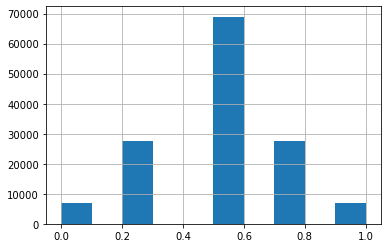

In [8]:
pd.Series(y_test).hist()
len(y_test)

In [9]:
automl = AutoML(
    mode="Perform", 
    total_time_limit=3600*5, 
    ml_task='regression',    
    eval_metric='spearman',
)
automl.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_15
The task is regression with evaluation metric spearman
AutoML will use algorithms: ['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 5 models
1_Default_LightGBM spearman 0.046744 trained in 190.56 seconds (1-sample predict time 0.1887 seconds)
2_Default_Xgboost spearman 0.051469 trained in 345.23 seconds (1-sample predict time 0.1898 seconds)
3_Default_CatBoost spearman 0.053536 trained in 625.69 seconds (1-sample predict time 0.3304 seconds)


An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.


4_Default_NeuralNetwork spearman 0.028833 trained in 175.23 seconds (1-sample predict time 0.1506 seconds)
5_Default_RandomForest spearman 0.041828 trained in 1427.85 seconds (1-sample predict time 0.7092 seconds)
* Step not_so_random will try to check up to 20 models
10_LightGBM spearman 0.052006 trained in 314.72 seconds (1-sample predict time 0.1915 seconds)
6_Xgboost spearman 0.042836 trained in 399.22 seconds (1-sample predict time 0.1897 seconds)
14_CatBoost spearman 0.051301 trained in 641.5 seconds (1-sample predict time 0.2101 seconds)
18_RandomForest spearman 0.041971 trained in 852.66 seconds (1-sample predict time 0.8876 seconds)


An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.


22_NeuralNetwork spearman -0.007069 trained in 146.37 seconds (1-sample predict time 0.1404 seconds)
11_LightGBM spearman 0.041094 trained in 196.82 seconds (1-sample predict time 0.1884 seconds)
7_Xgboost spearman 0.042698 trained in 416.06 seconds (1-sample predict time 0.1915 seconds)
15_CatBoost spearman 0.006581 trained in 396.79 seconds (1-sample predict time 0.4558 seconds)
19_RandomForest spearman 0.038061 trained in 1041.83 seconds (1-sample predict time 0.6975 seconds)


An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.


23_NeuralNetwork spearman 0.031152 trained in 187.78 seconds (1-sample predict time 0.1411 seconds)
12_LightGBM spearman 0.047323 trained in 282.52 seconds (1-sample predict time 0.1889 seconds)
8_Xgboost spearman 0.046269 trained in 423.78 seconds (1-sample predict time 0.1912 seconds)
16_CatBoost spearman 0.050791 trained in 515.9 seconds (1-sample predict time 0.2104 seconds)
20_RandomForest spearman 0.047371 trained in 3609.22 seconds (1-sample predict time 0.7025 seconds)
* Step golden_features will try to check up to 3 models
Add Golden Feature: feature_constitution78_ratio_feature_charisma9
Add Golden Feature: feature_strength29_ratio_feature_constitution85
Add Golden Feature: feature_constitution85_ratio_feature_strength29
Add Golden Feature: feature_charisma1_diff_feature_constitution56
Add Golden Feature: feature_constitution85_multiply_feature_charisma47
Add Golden Feature: feature_constitution93_ratio_feature_constitution100
Add Golden Feature: feature_constitution85_ratio_

AutoML(eval_metric='spearman', ml_task='regression', mode='Perform',
       total_time_limit=18000)

In [10]:
X_test.head()
y_test[:5]

,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,...,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46
id,,,,,,,,,,,,,,,,,,,,,
n0003aa52cab36c2,0.25,0.75,0.50,0.50,0.0,0.75,0.5,0.25,0.50,0.5,...,0.75,0.75,0.75,1.00,0.75,0.50,0.5,1.0,0.00,0.00
n000920ed083903f,0.75,0.50,0.75,1.00,0.5,0.00,0.0,0.75,0.25,0.0,...,0.50,0.50,0.50,0.75,1.00,0.75,0.5,0.5,0.50,0.50
n0038e640522c4a6,1.00,0.00,0.00,1.00,1.0,1.00,1.0,1.00,0.50,0.5,...,0.00,0.00,0.00,0.50,0.25,0.00,0.0,0.5,0.50,0.00
n004ac94a87dc54b,0.75,1.00,1.00,0.50,0.0,0.00,0.0,0.50,0.75,1.0,...,0.00,0.00,0.00,0.00,0.25,0.00,0.0,0.0,0.25,0.25
n0052fe97ea0c05f,0.25,0.50,0.50,0.25,1.0,0.50,0.5,0.25,0.25,0.5,...,0.50,0.50,0.75,0.00,0.00,0.75,1.0,0.0,0.25,1.00


array([0.25, 0.5 , 1.  , 0.5 , 0.75])

Test MSE: 0.049946962404255814


id
n0003aa52cab36c2    0.485787
n000920ed083903f    0.482559
n0038e640522c4a6    0.520629
n004ac94a87dc54b    0.498672
n0052fe97ea0c05f    0.503101
dtype: float64

<AxesSubplot:>

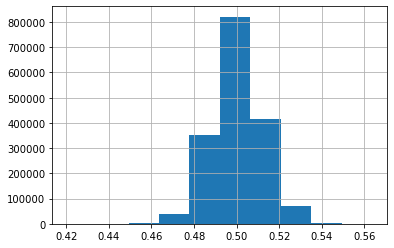

In [12]:


# compute the MSE on test data
predictions = automl.predict(X_test)
valid = ~np.isnan(y_test)
print("Test MSE:", mean_squared_error(y_test[valid], predictions[valid]))

predictions = pd.Series(predictions, index=rm.data.tournament.index)
predictions.head()
predictions.hist()

predictions = pd.DataFrame(predictions).rename({0: 'prediction'}, axis=1)

predictions.to_csv('auto_ml_submission.csv', header=True)

<AxesSubplot:>

array([[<AxesSubplot:title={'center':'prediction'}>]], dtype=object)

1703902

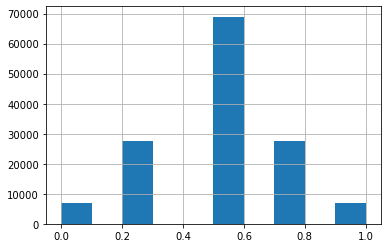

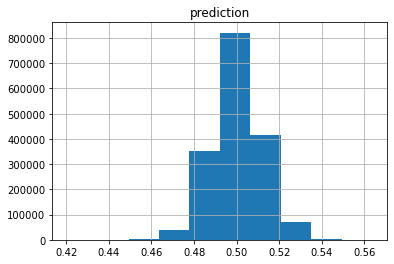

In [13]:
pd.Series(y_test).hist()
predictions.hist()
len(y_test)

Train MSE: 0.0490037715880594


id
n000315175b67977    0.490617
n0014af834a96cdd    0.502268
n001c93979ac41d4    0.481805
n0034e4143f22a13    0.498282
n00679d1a636062f    0.488117
dtype: float64

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

501808

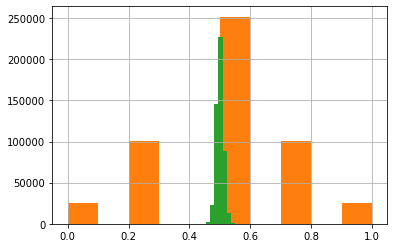

In [14]:
# compute the MSE on train data
predictions_train = automl.predict(X_train)
print("Train MSE:", mean_squared_error(y_train, predictions_train))

predictions_train = pd.Series(predictions_train, index=rm.data.training.index)
predictions_train.head()
predictions_train.hist()

pd.Series(y_train).hist()
predictions_train.hist()
len(y_train)

In [60]:
from IPython.display import Audio, display
def allDone():
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

allDone()


# RMSE 

In [15]:
automl = AutoML(
    mode="Perform", 
    total_time_limit=3600*5, 
    ml_task='regression',    
    eval_metric='rmse',
)
automl.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_16
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 5 models
1_Default_LightGBM rmse 0.223028 trained in 152.59 seconds (1-sample predict time 0.1901 seconds)
2_Default_Xgboost rmse 0.222968 trained in 267.51 seconds (1-sample predict time 0.1904 seconds)
3_Default_CatBoost rmse 0.222947 trained in 320.84 seconds (1-sample predict time 0.2167 seconds)
4_Default_NeuralNetwork rmse 0.223265 trained in 174.08 seconds (1-sample predict time 0.1412 seconds)
5_Default_RandomForest rmse 0.223131 trained in

AutoML(eval_metric='rmse', ml_task='regression', mode='Perform',
       total_time_limit=18000)

In [16]:
X_test.head()
y_test[:5]

,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,...,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46
0,0.25,0.75,0.50,0.50,0.0,0.75,0.5,0.25,0.50,0.5,...,0.75,0.75,0.75,1.00,0.75,0.50,0.5,1.0,0.00,0.00
1,0.75,0.50,0.75,1.00,0.5,0.00,0.0,0.75,0.25,0.0,...,0.50,0.50,0.50,0.75,1.00,0.75,0.5,0.5,0.50,0.50
2,1.00,0.00,0.00,1.00,1.0,1.00,1.0,1.00,0.50,0.5,...,0.00,0.00,0.00,0.50,0.25,0.00,0.0,0.5,0.50,0.00
3,0.75,1.00,1.00,0.50,0.0,0.00,0.0,0.50,0.75,1.0,...,0.00,0.00,0.00,0.00,0.25,0.00,0.0,0.0,0.25,0.25
4,0.25,0.50,0.50,0.25,1.0,0.50,0.5,0.25,0.25,0.5,...,0.50,0.50,0.75,0.00,0.00,0.75,1.0,0.0,0.25,1.00


array([0.25, 0.5 , 1.  , 0.5 , 0.75])

In [ ]:
# Get preds for a model
output = model.predict(rm.data.tournament)
output.shape
output.head()

# Get performance of the model

In [ ]:
# Get predictions for each model
rm.generate_predictions_for_all_models()

In [ ]:
# Submit predictions (test with rpica_test_3)
# Can I check if I submitted? (for example requesting the scoring)


In [ ]:
_=[print(attr) for attr in dir(napi) if not attr.startswith('_')]

In [ ]:
# get competitions
all_competitions = napi.get_competitions()
all_competitions[:2]

In [ ]:
# get leaderboard for the current round
leaderboard = napi.get_leaderboard(limit=10000)
len(leaderboard)
leaderboard_dict = {competitor['username']:competitor for competitor in leaderboard}

In [ ]:
leaderboard_dict['rpica']
leaderboard_dict['rpica_test_1']

In [ ]:
# check if a new round has started
if napi.check_new_round():
    print("new round has started wihtin the last 24hours!")
else:
    print("no new round within the last 24 hours")

In [ ]:
# provide api tokens
from numebot.secret import PUBLIC_KEY, PRIVATE_KEY


In [ ]:
napi = numerapi.NumerAPI(PUBLIC_KEY, PRIVATE_KEY)

In [ ]:
models_dict = napi.get_models()

# upload predictions
#submission_id = napi.upload_predictions("preds.csv", tournament=1)
# check submission status
napi.submission_status(model_id=models_dict['rpica'])

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from pathlib import Path

DATA_FOLDER = Path('/home/pica/hdd/nas/Data/numerai/21-03-14 weekly/')
DATA_FOLDER = Path('/home/pica/hdd/nas/Data/numerai/numerai_dataset_258/')
OUTPUT_FOLDER = Path('/home/pica/hdd/nas/Data/numerai/output/')

# training data contains features and targets
training_data = pd.read_csv(DATA_FOLDER/"numerai_training_data.csv").set_index("id")

# tournament data contains features only
tournament_data = pd.read_csv(DATA_FOLDER/"numerai_tournament_data.csv").set_index("id")
feature_names = [f for f in training_data.columns if "feature" in f]

live_data = tournament_data[tournament_data['data_type'] == 'live']
tournament_data = tournament_data[tournament_data['data_type'] != 'live']

training_data['era'] = training_data['era'].str.lstrip('era').astype(int)
tournament_data['era'] = tournament_data['era'].str.lstrip('era').astype(int)
live_data['era'] = live_data['era'].str.lstrip('era')

training_data.shape
tournament_data.shape
live_data.shape

## EDA

In [ ]:
training_data.info()
live_data.info()
tournament_data.info()

In [ ]:
import numpy as np

In [ ]:
for dataset, set_name in zip([training_data, tournament_data, live_data], ['training', 'tournament', 'live']):
    print(f'Info about {set_name}: shape {dataset.shape}')
    #dataset[[col for col in dataset.columns if 'feature' not in col]].head(2)
    dataset.groupby('data_type')['era'].agg(['count','min','max', pd.Series.nunique, lambda x: sorted(list(np.unique(x)))])
    

train_era = training_data

## Experiment with feature neutralization 

In [ ]:
def neutralize(df, target="prediction_kazutsugi", by=None, proportion=1.0):
    if by is None:
        by = [x for x in df.columns if x.startswith('feature')]

    scores = df[target]
    exposures = df[by].values

    # constant column to make sure the series is completely neutral to exposures
    exposures = np.hstack((exposures, np.array([np.mean(scores)] * len(exposures)).reshape(-1, 1)))

    scores -= proportion * (exposures @ (np.linalg.pinv(exposures) @ scores.values))
    return scores / scores.std()

In [ ]:
DATA_FOLDER = Path('/home/pica/hdd/nas/Data/numerai/numerai_dataset_258/')
OUTPUT_PATH = DATA_FOLDER/'submission.csv'

In [ ]:
outputs = pd.read_csv(OUTPUT_PATH).set_index("id")
outputs.shape
outputs.head(2)
len(outputs) - outputs.nunique()

In [ ]:
tournament_data = pd.read_csv(DATA_FOLDER/"numerai_tournament_data.csv").set_index("id")
tournament_data.shape

In [ ]:
tournament_data['target'] = outputs
tournament_data.shape

In [ ]:
neutralized = neutralize(tournament_data, target='target')

In [ ]:
neutralized = pd.DataFrame(neutralized)
neutralized.head(2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

neutralized.rename({'target': 'prediction'}, axis=1, inplace=True)
neutralized.head()
neutralized_scaled = neutralized.copy()
neutralized_scaled[['prediction']] = scaler.fit_transform(neutralized[['prediction']])

In [ ]:
neutralized_scaled.describe().loc[['min', 'max'], :]

In [ ]:
neutralized_scaled.to_csv(DATA_FOLDER/"submission_neutralized.csv", header=True)

## train

In [ ]:
# train a model to make predictions on tournament data
model = XGBRegressor(max_depth=5, learning_rate=0.01, \
                     n_estimators=2000, colsample_bytree=0.1, n_jobs=-1)
model.fit(training_data[feature_names], training_data["target"])

# submit predictions to numer.ai
predictions = model.predict(tournament_data[feature_names])

In [ ]:
predictions = pd.DataFrame({'predictions': predictions}, index=tournament_data.index)

In [ ]:
pd.Series(predictions).shape
OUTPUT_FOLDER.mkdir(exist_ok=True, parents=True)
pd.Series(predictions).to_csv(OUTPUT_FOLDER/"predictions.csv")

In [ ]:
for data in [training_data, tournament_data]:
    print(data.shape)
    print(data[['era']].nunique())
    print(data[['era']].max())
    print(data.index.nunique())
    data.head()
    print('')
    

In [ ]:
predictions

In [ ]:
training_data.head()
tournament_data.head()

In [ ]:
tournament_data.shape
tournament_data.head()

for era in tournament_data['era'].unique():
    ids_in_era = tournament_data[tournament_data['era'] == era].index
    era_preds = predictions[predictions.index.isin(ids_in_era)]
    
    if era_preds['predictions'].nunique() != len(era_preds):
        print(f'Repeated values in {era}: len {len(era_preds)}, unique values: {era_preds["predictions"].nunique()}')

Test MSE: 0.0499341992127032


id
n0003aa52cab36c2    0.488136
n000920ed083903f    0.487659
n0038e640522c4a6    0.525015
n004ac94a87dc54b    0.501979
n0052fe97ea0c05f    0.502004
dtype: float64

<AxesSubplot:>

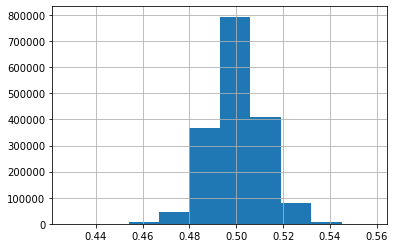

In [17]:
# compute the MSE on test data
predictions = automl.predict(X_test)
valid = ~np.isnan(y_test)
print("Test MSE:", mean_squared_error(y_test[valid], predictions[valid]))

predictions = pd.Series(predictions, index=rm.data.tournament.index)
predictions.head()
predictions.hist()

predictions = pd.DataFrame(predictions).rename({0: 'prediction'}, axis=1)
#predictions.to_csv('auto_ml_submission.csv', header=True)

<AxesSubplot:>

array([[<AxesSubplot:title={'center':'prediction'}>]], dtype=object)

1703902

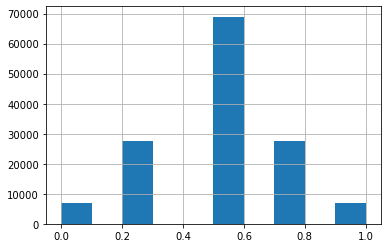

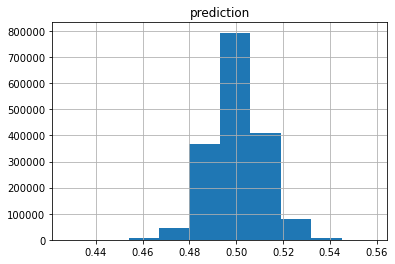

In [18]:
pd.Series(y_test).hist()
predictions.hist()
len(y_test)

Train MSE: 0.04888492273681071


id
n000315175b67977    0.495926
n0014af834a96cdd    0.501810
n001c93979ac41d4    0.481193
n0034e4143f22a13    0.497955
n00679d1a636062f    0.491375
dtype: float64

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

501808

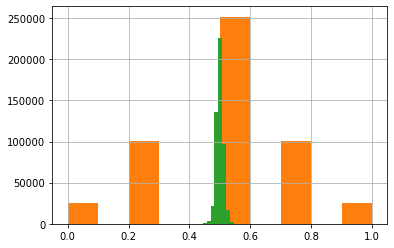

In [19]:
# compute the MSE on train data
predictions_train = automl.predict(X_train)
print("Train MSE:", mean_squared_error(y_train, predictions_train))

predictions_train = pd.Series(predictions_train, index=rm.data.training.index)
predictions_train.head()
predictions_train.hist()

pd.Series(y_train).hist()
predictions_train.hist()
len(y_train)

# R²

In [20]:
automl = AutoML(
    mode="Perform", 
    total_time_limit=3600*10, 
    ml_task='regression',    
    eval_metric='r2',
)
automl.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_17
The task is regression with evaluation metric r2
AutoML will use algorithms: ['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 5 models
1_Default_LightGBM r2 0.002144 trained in 165.78 seconds (1-sample predict time 0.1929 seconds)
2_Default_Xgboost r2 0.002687 trained in 280.46 seconds (1-sample predict time 0.1899 seconds)
3_Default_CatBoost r2 0.002874 trained in 324.6 seconds (1-sample predict time 0.2136 seconds)
4_Default_NeuralNetwork r2 2.5e-05 trained in 174.55 seconds (1-sample predict time 0.3129 seconds)
5_Default_RandomForest r2 0.001221 trained in 1405.71 secon

51_LightGBM r2 0.00248 trained in 194.56 seconds (1-sample predict time 0.1891 seconds)
52_LightGBM_GoldenFeatures r2 0.00235 trained in 226.19 seconds (1-sample predict time 0.3039 seconds)
53_RandomForest r2 0.002012 trained in 3199.33 seconds (1-sample predict time 0.6928 seconds)
54_RandomForest r2 0.001938 trained in 1666.35 seconds (1-sample predict time 0.705 seconds)
55_RandomForest not trained. Stop training after the first fold. Time needed to train on the first fold 659.0 seconds. The time estimate for training on all folds is larger than total_time_limit.
56_NeuralNetwork r2 0.000358 trained in 183.37 seconds (1-sample predict time 0.1477 seconds)
57_NeuralNetwork r2 7e-06 trained in 198.51 seconds (1-sample predict time 0.1474 seconds)
58_NeuralNetwork r2 -6.2e-05 trained in 173.33 seconds (1-sample predict time 0.1497 seconds)
59_NeuralNetwork r2 2.1e-05 trained in 179.46 seconds (1-sample predict time 0.1469 seconds)
* Step ensemble will try to check up to 1 model
Ensemb

AutoML(eval_metric='r2', ml_task='regression', mode='Perform',
       total_time_limit=36000)

In [21]:
X_test.head()
y_test[:5]

,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,...,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46
0,0.25,0.75,0.50,0.50,0.0,0.75,0.5,0.25,0.50,0.5,...,0.75,0.75,0.75,1.00,0.75,0.50,0.5,1.0,0.00,0.00
1,0.75,0.50,0.75,1.00,0.5,0.00,0.0,0.75,0.25,0.0,...,0.50,0.50,0.50,0.75,1.00,0.75,0.5,0.5,0.50,0.50
2,1.00,0.00,0.00,1.00,1.0,1.00,1.0,1.00,0.50,0.5,...,0.00,0.00,0.00,0.50,0.25,0.00,0.0,0.5,0.50,0.00
3,0.75,1.00,1.00,0.50,0.0,0.00,0.0,0.50,0.75,1.0,...,0.00,0.00,0.00,0.00,0.25,0.00,0.0,0.0,0.25,0.25
4,0.25,0.50,0.50,0.25,1.0,0.50,0.5,0.25,0.25,0.5,...,0.50,0.50,0.75,0.00,0.00,0.75,1.0,0.0,0.25,1.00


array([0.25, 0.5 , 1.  , 0.5 , 0.75])

Test MSE: 0.04994427355099165


id
n0003aa52cab36c2    0.494929
n000920ed083903f    0.486247
n0038e640522c4a6    0.526219
n004ac94a87dc54b    0.504676
n0052fe97ea0c05f    0.498951
dtype: float64

<AxesSubplot:>

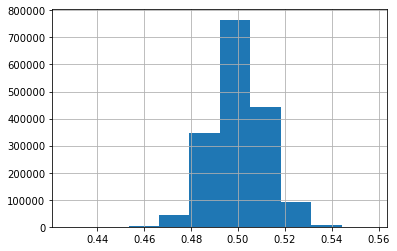

In [22]:
# compute the MSE on test data
predictions = automl.predict(X_test)
valid = ~np.isnan(y_test)
print("Test MSE:", mean_squared_error(y_test[valid], predictions[valid]))

predictions = pd.Series(predictions, index=rm.data.tournament.index)
predictions.head()
predictions.hist()

predictions = pd.DataFrame(predictions).rename({0: 'prediction'}, axis=1)
#predictions.to_csv('auto_ml_submission.csv', header=True)

<AxesSubplot:>

array([[<AxesSubplot:title={'center':'prediction'}>]], dtype=object)

1703902

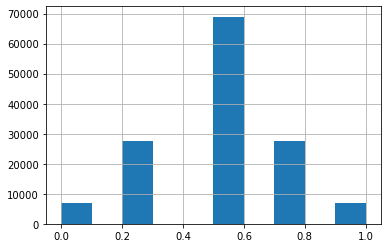

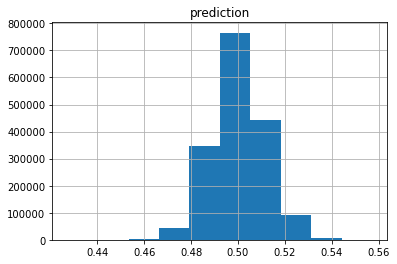

In [23]:
pd.Series(y_test).hist()
predictions.hist()
len(y_test)

Train MSE: 0.049150019221168254


id
n000315175b67977    0.492985
n0014af834a96cdd    0.500209
n001c93979ac41d4    0.486984
n0034e4143f22a13    0.495996
n00679d1a636062f    0.492534
dtype: float64

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

501808

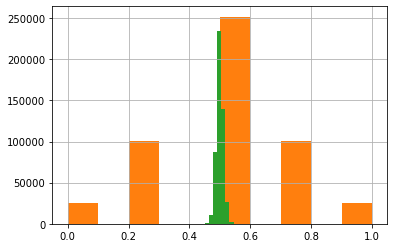

In [24]:
# compute the MSE on train data
predictions_train = automl.predict(X_train)
print("Train MSE:", mean_squared_error(y_train, predictions_train))

predictions_train = pd.Series(predictions_train, index=rm.data.training.index)
predictions_train.head()
predictions_train.hist()

pd.Series(y_train).hist()
predictions_train.hist()
len(y_train)

# rmse - with noisy data

In [26]:
train_with_noise = rm.data.noisy_training(5)
print(train_with_noise.shape)
for col in feature_cols:
    train_with_noise[col] = train_with_noise[col].astype(float)
    
X_train = train_with_noise[feature_cols]
y_train = train_with_noise['target'].astype(float).values

(2509040, 311)


In [27]:
automl = AutoML(
    mode="Perform", 
    total_time_limit=3600*6, 
    ml_task='regression',    
    eval_metric='rmse',
    n_jobs=22,
)
automl.fit(X_train, y_train)

Neural Network algorithm was disabled because it doesn't support n_jobs parameter.
Linear algorithm was disabled.
AutoML directory: AutoML_18
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 4 models
1_Default_LightGBM rmse 0.162652 trained in 10551.71 seconds (1-sample predict time 0.2152 seconds)
* Step not_so_random will try to check up to 16 models
6_LightGBM rmse 0.179746 trained in 7823.65 seconds (1-sample predict time 0.2129 seconds)
Skip golden_features because no parameters were generated.
Skip insert_random_feature because no parameters were generated.
Skip fea

AutoML(eval_metric='rmse', ml_task='regression', mode='Perform', n_jobs=22,
       total_time_limit=21600)

In [28]:
X_test.head()
y_test[:5]

,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,...,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46
0,0.25,0.75,0.50,0.50,0.0,0.75,0.5,0.25,0.50,0.5,...,0.75,0.75,0.75,1.00,0.75,0.50,0.5,1.0,0.00,0.00
1,0.75,0.50,0.75,1.00,0.5,0.00,0.0,0.75,0.25,0.0,...,0.50,0.50,0.50,0.75,1.00,0.75,0.5,0.5,0.50,0.50
2,1.00,0.00,0.00,1.00,1.0,1.00,1.0,1.00,0.50,0.5,...,0.00,0.00,0.00,0.50,0.25,0.00,0.0,0.5,0.50,0.00
3,0.75,1.00,1.00,0.50,0.0,0.00,0.0,0.50,0.75,1.0,...,0.00,0.00,0.00,0.00,0.25,0.00,0.0,0.0,0.25,0.25
4,0.25,0.50,0.50,0.25,1.0,0.50,0.5,0.25,0.25,0.5,...,0.50,0.50,0.75,0.00,0.00,0.75,1.0,0.0,0.25,1.00


array([0.25, 0.5 , 1.  , 0.5 , 0.75])

Test MSE: 0.053034580147319724


id
n0003aa52cab36c2    0.444110
n000920ed083903f    0.499724
n0038e640522c4a6    0.588695
n004ac94a87dc54b    0.415197
n0052fe97ea0c05f    0.526896
dtype: float64

<AxesSubplot:>

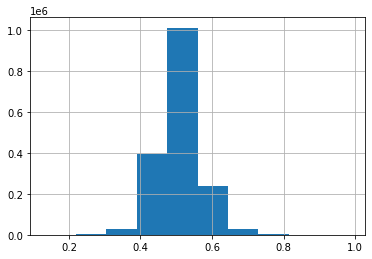

In [37]:
# compute the MSE on test data
predictions = automl.predict(X_test)
valid = ~np.isnan(y_test)
print("Test MSE:", mean_squared_error(y_test[valid], predictions[valid]))

predictions = pd.Series(predictions, index=rm.data.tournament.index)
predictions.head()
predictions.hist()

predictions = pd.DataFrame(predictions).rename({0: 'prediction'}, axis=1)

In [38]:
predictions.to_csv('auto_ml_submission_with_noise.csv', header=True)

In [39]:
from IPython.display import Audio, display
def make_noise():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
make_noise()

<AxesSubplot:>

array([[<AxesSubplot:title={'center':'prediction'}>]], dtype=object)

1703902

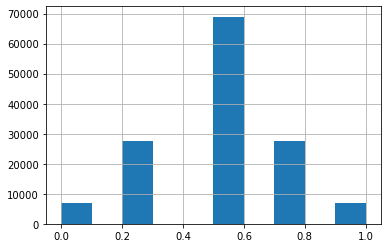

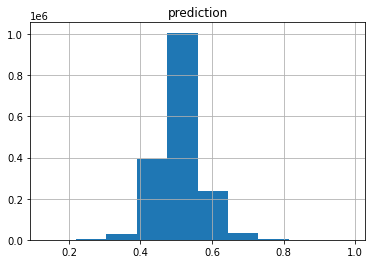

In [30]:
pd.Series(y_test).hist()
predictions.hist()
len(y_test)

In [ ]:
# compute the MSE on train data
predictions_train = automl.predict(X_train)
print("Train MSE:", mean_squared_error(y_train, predictions_train))

id
n000315175b67977    0.499019
n0014af834a96cdd    0.447349
n001c93979ac41d4    0.425473
n0034e4143f22a13    0.421356
n00679d1a636062f    0.504439
dtype: float64

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

2509040

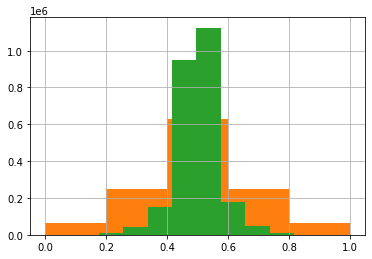

In [33]:
predictions_train = pd.Series(predictions_train, index=train_with_noise.index)
predictions_train.head()
predictions_train.hist()

pd.Series(y_train).hist()
predictions_train.hist()
len(y_train)

In [ ]:
# carefull i run and remove a create - noisy df cell

In [ ]:
with_noise = rm.data.noisy_training(2)